# Metody Obliczeniowe w Nauce i Technice Laboratorium 1
### Błażej Kustra

In [2]:
from numpy import float32
import matplotlib.pyplot as plt
import time
import numpy as np

In [7]:
def relative_error(result, real_result):
    return abs((result - real_result) / real_result)


def absolute_error(result, real_result):
    return abs(result - real_result)

In [8]:
number = float32(0.5312500)
numbers = [number] * 10 ** 7

start_time = time.time()

noraml_sum = float32(0.0)
for i in numbers:
    noraml_sum += i

end_time = time.time()

print('1. czas wykonywania normalnej sumy: ', end_time - start_time)
print('2. suma: ', noraml_sum)
print('2. blad wzgledny: ', relative_error(number * (10 ** 7), noraml_sum))
print('2. blad bezwzgledny: ', absolute_error(number * (10 ** 7), noraml_sum))

1. czas wykonywania normalnej sumy:  4.337789058685303
2. suma:  5030840.5
2. blad wzgledny:  0.05598656924225683
2. blad bezwzgledny:  281659.5


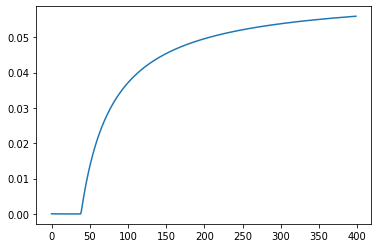

In [9]:
def relative_error_over_time():
    sum = float32(0.0)
    relative_errors = []

    for index in range(0, len(numbers)):
        sum += numbers[index]
        if index % 25000 == 0 and index != 0:
            relative_errors.append(relative_error(0.53125 * index, sum));

    plt.plot(relative_errors)
    plt.show()

relative_error_over_time()

In [10]:
def recursive_sum_of(list):
    if len(list) == 0:
        return float32(0.0)
    elif len(list) == 1:
        return list[0]
    elif len(list) == 2:
        return list[0] + list[1]
    return recursive_sum_of(list[:int(len(list) / 2)]) + recursive_sum_of(list[int(len(list) / 2):])


start_time = time.time()
recursive_sum = recursive_sum_of(numbers)
end_time = time.time()

print('4. czas wykonywania rekurencyjnej sumy: ', end_time - start_time)
print('4. rekurencyjna suma: ', recursive_sum)

print('5. blad wzgledny: ', relative_error(number * (10 ** 7), recursive_sum))
print('5. blad bezwzgledny: ', absolute_error(number * (10 ** 7), recursive_sum))

recursive_sum = recursive_sum_of(numbers)

print('7. blad wzgledny: ', relative_error(number * (10 ** 7), recursive_sum))

4. czas wykonywania rekurencyjnej sumy:  25.288239002227783
4. rekurencyjna suma:  5312500.0
5. blad wzgledny:  0.0
5. blad bezwzgledny:  0.0
7. blad wzgledny:  0.0


In [11]:
def kahan_algorithm(numbers):
    result = float32(0.0)
    err = float32(0.0)

    for elem in numbers:
        y = elem - err
        temp = result + y

        err = (temp - result) - y
        result = temp
    return sum

start_time = time.time()
kahan_sum = kahan_algorithm(numbers)
end_time = time.time()

print('1. suma (kahan):', kahan_sum)
print('1. blad wzgledny (kahan):', relative_error(number * (10 ** 7), kahan_sum))
print('1. blad bezwzgledny (kahan):', absolute_error(number * (10 ** 7), kahan_sum))

print('2. sluzy do odjecia bledu on nastepnej liczby po to aby blad przy dodawaniu byl rekompensowany przez roznice elementu oraz erroru')

print('3. czas wykonywania algorytmu kahan: ', end_time - start_time)

1. suma (kahan): 5312500.0
1. blad wzgledny (kahan): 0.0
1. blad bezwzgledny (kahan): 0.0
2. sluzy do odjecia bledu on nastepnej liczby po to aby blad przy dodawaniu byl rekompensowany przez roznice elementu oraz erroru
3. czas wykonywania algorytmu kahan:  8.379642009735107


In [4]:
def dzeta_forward(result, n, s):
    for k in range(1, n):
        result += 1 / (k ** s)
    return result


def dzeta_backward(result, n, s):
    for k in range(n, 0, -1):
        result += 1 / (k ** s)
    return result


def eta_forward(result, n, s):
    for k in range(1, n):
        result += ((-1) ** (k - 1)) / (k ** s)
    return result


def eta_backward(result, n, s):
    for k in range(n, 0, -1):
        result += ((-1) ** (k - 1)) / (k ** s)

    return result

In [5]:
float_points = [float32(2.0), float32(3.6667), float32(5.0), float32(7.2), float32(10.0)]
double_points = [2.0, 3.6667, 5.0, 7.2, 10.0]
iterations = [50, 100, 200, 500, 1000]

def dzeta():
    for s in range(0, 5):
        for n in iterations:
            print('point:', float_points[s],
                  ' n:', n, ' dzeta:',
                  dzeta_forward(float32(0.0), n, float_points[s]),
                  dzeta_forward(0.0, n, double_points[s]),
                  dzeta_backward(float32(0.0), n, float_points[s]),
                  dzeta_backward(0.0, n, double_points[s]))
        print()

dzeta()

# Metoda sumowania w przód polega na dodawaniu wyrazow o rosnacych indeksach do dotychczasowej sumy.
# Przez to w przypadku dzety dodajemy do stosunkowo duzej liczby bardzo male wartosci i to jest powodem
# utraty precyzji. W przypadku sumowania wstecz sytuacja wyglada zupelnie inaczej, dodajemy przy kazdej iteracji
# do dotychczasowej sumy wartosc wieksza - co za tym idzie wynik jest obarczony mniejszym bledem.

def eta():
    for s in range(0, 5):
        for n in iterations:
            print('point:', float_points[s],
                  ' n:', n, ' eta:',
                  eta_forward(float32(0.0), n, float_points[s]),
                  eta_forward(0.0, n, double_points[s]),
                  eta_backward(float32(0.0), n, float_points[s]),
                  eta_backward(0.0, n, double_points[s]))
        print()

eta()

point: 2.0  n: 50  dzeta: 1.6247327336215291 1.6247327336215291 1.6251327336215293 1.6251327336215293
point: 2.0  n: 100  dzeta: 1.6348839001848923 1.6348839001848923 1.634983900184893 1.634983900184893
point: 2.0  n: 200  dzeta: 1.6399215460149972 1.6399215460149972 1.6399465460149973 1.6399465460149973
point: 2.0  n: 500  dzeta: 1.642932065514894 1.642932065514894 1.6429360655148941 1.6429360655148941
point: 2.0  n: 1000  dzeta: 1.6439335666815615 1.6439335666815615 1.6439345666815597 1.6439345666815597

point: 3.6667  n: 50  dzeta: 1.109399176618411 1.1093991657860138 1.1093997659868533 1.1093997551541943
point: 3.6667  n: 100  dzeta: 1.109408761770302 1.1094087509333836 1.1094088081790894 1.1094087973421476
point: 3.6667  n: 200  dzeta: 1.1094102495165907 1.1094102386788545 1.1094102531709702 1.109410242333231
point: 3.6667  n: 500  dzeta: 1.109410501555004 1.1094104907171054 1.1094105016819695 1.1094104908440725
point: 3.6667  n: 1000  dzeta: 1.1094105216702763 1.10941051083236 1.

In [15]:
def logistic(r, x):
    return r * x * (1 - x)


def bifurcation_diagram(x_0, skip, iterations, minimal_r=0, maximal_r=4):
    R = []
    X = []
    r_range = np.linspace(minimal_r, maximal_r, int(1 / 0.0001))

    for r in r_range:
        x = x_0
        for i in range(iterations + skip):
            if i >= skip:
                R.append(r)
                X.append(x)

            x = logistic(r, x)

    plt.plot(R, X, ls='', marker=',')
    plt.ylim(0, 1)
    plt.xlim(minimal_r, maximal_r)
    plt.xlabel('wartosci r')
    plt.ylabel('wartosci x')
    plt.show()

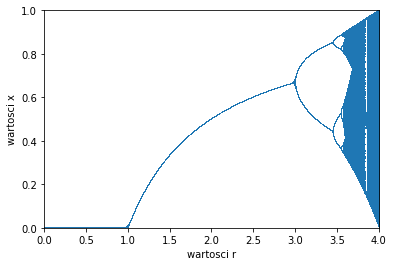

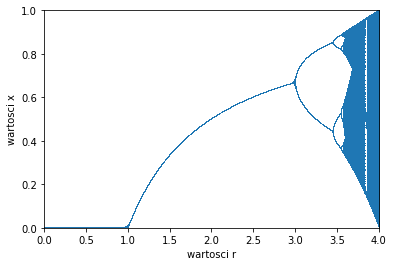

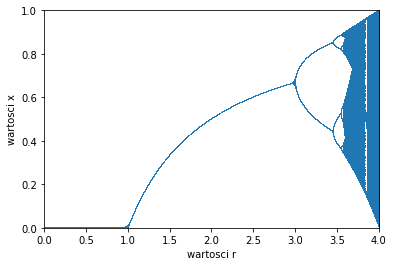

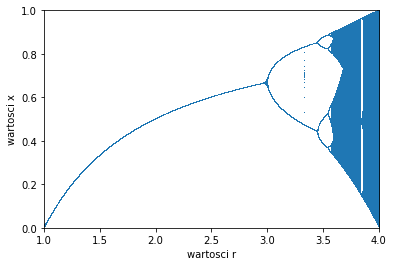

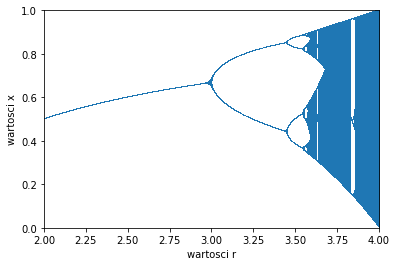

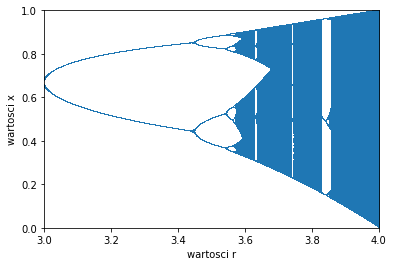

In [17]:
bifurcation_diagram(0.10, 100, 500)
bifurcation_diagram(0.25, 100, 500)
bifurcation_diagram(0.50, 100, 500)

bifurcation_diagram(0.10, 100, 500, minimal_r=1)
bifurcation_diagram(0.25, 100, 500, minimal_r=2)
bifurcation_diagram(0.50, 100, 500, minimal_r=3)

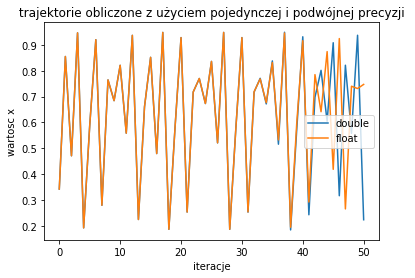

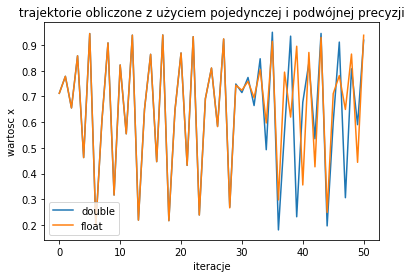

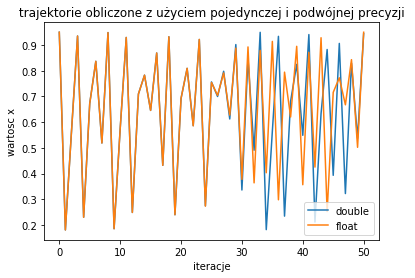

In [22]:
def trajectories(double, float, r_double, r_float):
    doubles = []
    floats = []
    indexes = []

    for index in range(0, 51):
        double = logistic(r_double, double);
        float = logistic(r_float, float);

        indexes.append(index)
        doubles.append(double)
        floats.append(float)

    plt.plot(indexes, doubles, label='double')
    plt.plot(indexes, floats, label='float')
    plt.title(' trajektorie obliczone z użyciem pojedynczej i podwójnej precyzji ')
    plt.ylabel('wartosc x')
    plt.xlabel('iteracje')
    plt.legend()
    plt.show()


trajectories(0.1, np.float32(0.1), 3.8, np.float32(3.8))
trajectories(0.25, np.float32(0.25), 3.8, np.float32(3.8))
trajectories(0.50, np.float32(0.50), 3.8, np.float32(3.8))

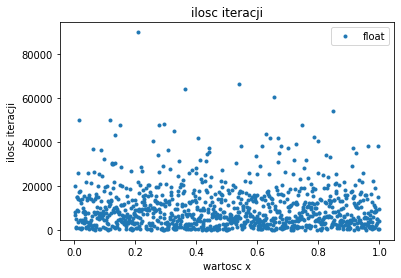

In [21]:
def count_iterations(x, r, iterations_threshold):
    epsilon = 1e-7
    iteration = 0

    while x > epsilon:
        if iterations_threshold < iteration:
            return 0
        x = logistic(r, x)
        iteration += 1

    return iteration


def plot_all_iterations():
    x = np.float32(0.001)

    xs = []
    iterations = []

    for i in range(1, 1000):
        print(i, end="\r")
        xs.append(x * i)
        iterations.append(count_iterations(x * i, np.float32(4), 1e7))

    plt.plot(xs, iterations, '.', label='float')
    plt.title('ilosc iteracji')
    plt.ylabel('ilosc iteracji')
    plt.xlabel('wartosc x')
    plt.legend()
    plt.show()

plot_all_iterations()